In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import gmres, cg

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

from polara import get_movielens_data

# Preparing Data

We will work with the Movielens-1M dataset from [Grouplens](https://grouplens.org/datasets/movielens/).

In [ ]:
# donwload ratings and movie genres info
data, genres = get_movielens_data(get_genres=True, split_genres=False)

In [ ]:
# assemble sparse user-item matrix of ratings
rating_matrix = ...

# Implementing Baseline Predictors

Recall, the optimization problem is:
$$
\min_{g, f} \sum_{(i,j)\in\mathcal O} (r_{ij} - g_i - f_j)^2.
$$

This leads to a system of equations:
$$
\begin{cases}
D_g g + S f = b_g, \\
D_f f + S^\top g= b_f,
\end{cases}
$$
where 
 - $S$ is the non-zero pattern of the rating matrix; 
 - $D_g$ and $D_f$ are diagonal matrices with the number of non-zero elements in each row and column of $S$, respectively; 
 - $b_g$ and $b_f$ are the sums of the ratings for each user and item, respectively.


The system of equations can be rewritten in single SLAE form:
$$
\left(D_f-S^\top D_g^{-1} S\right) f = b_f - S^\top D_g^{-1} S b_g.
$$

After finding $f$, we can find $g$ as:
$$
g = D_g^{-1} (b_g - S f).
$$


## Preparing the input data

In [ ]:
# construct sparsity pattern matrix (with float elements)
S = ...

In [ ]:
# compute nnz counters per user and per item
nnz_g = ...
nnz_f = ...

In [ ]:
# define matvec for LinearOperator that will be used in solver
def matvec_f(vec):
    ...

In [ ]:
# compute the right-hand side of the SLAE

bg = ... # user-based ratings average
bf = ... # item-based ratings average

rhs_f = ... # the right-hand side of the SLAE

## Solving the system

In [ ]:
# define linear operator to be used in solver
G = ...

In [ ]:
# solve the system of linear equations
...

By construction, the baseline predictor must be centered around 0. Let's check this property and correct it if needed.

In [ ]:
# code to enure variable centering of f
...

In [ ]:
# find the remaining part of the solution ()
...

In [ ]:
# ensure centering of g
...

In [ ]:
# define globale average
mu = ...

# Analysis

In [ ]:
# plot histogram of the baseline predictor values
...

In [ ]:
# calculate item popularity vector
# make sure it is ordered by proper item index that corresponds to vector f
itempop = ...

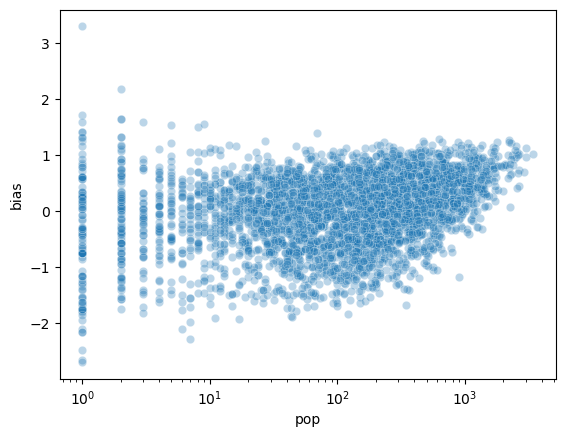

In [ ]:
# compare item part of the baseline predictor to item popularity
sns.scatterplot(
    pd.DataFrame({'pop': itempop.values, 'bias': f}),
    x='pop',
    y='bias',
    alpha=0.3
)
plt.xscale('log')

In [ ]:
# repeat the task for user baseline predictor

In [ ]:
user_index = usercat.cat.categories.rename('userid')
useract = data['userid'].value_counts(sort=False, normalize=False).loc[user_index]

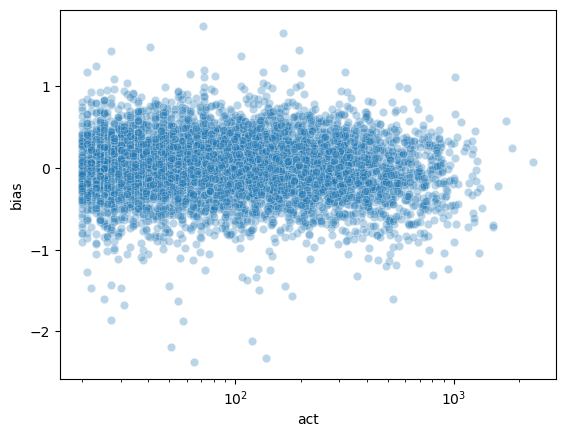

In [ ]:
sns.scatterplot(
    pd.DataFrame({'act': useract.values, 'bias': g}),
    x='act',
    y='bias',
    alpha=0.3
)
plt.xscale('log')